In [1]:
# modules we'll use
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Load transaction data
transaction_data = pd.read_csv('QVI_transaction_data.csv')

# Load purchase behaviour data
purchase_behaviour = pd.read_csv('QVI_purchase_behaviour.csv')


FileNotFoundError: [Errno 2] No such file or directory: 'QVI_transaction_data.csv'

In [3]:
# Load transaction data
transaction_data = pd.read_csv('QVI_transaction_data.csv')

# Load purchase behaviour data
purchase_behaviour = pd.read_csv('QVI_purchase_behaviour.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'QVI_transaction_data.csv'

In [4]:
import os
import pandas as pd

# List files in the current directory
print("Files in the current directory:")
print(os.listdir())

Files in the current directory:
['.ipynb_checkpoints', 'QVI_purchase_behaviour.csv', 'QVI_transaction_data.xlsx', 'Untitled.ipynb']


In [5]:
!pip install openpyxl

In [7]:
# Load transaction data from Excel file
transaction_data = pd.read_excel('QVI_transaction_data.xlsx')

# Load purchase behaviour data from CSV file
purchase_behaviour = pd.read_csv('QVI_purchase_behaviour.csv')

# Display first few rows of each dataset to confirm successful loading
print(transaction_data.head())
print(purchase_behaviour.head())


    DATE  STORE_NBR  LYLTY_CARD_NBR  TXN_ID  PROD_NBR  \
0  43390          1            1000       1         5   
1  43599          1            1307     348        66   
2  43605          1            1343     383        61   
3  43329          2            2373     974        69   
4  43330          2            2426    1038       108   

                                  PROD_NAME  PROD_QTY  TOT_SALES  
0    Natural Chip        Compny SeaSalt175g         2        6.0  
1                  CCs Nacho Cheese    175g         3        6.3  
2    Smiths Crinkle Cut  Chips Chicken 170g         2        2.9  
3    Smiths Chip Thinly  S/Cream&Onion 175g         5       15.0  
4  Kettle Tortilla ChpsHny&Jlpno Chili 150g         3       13.8  
   LYLTY_CARD_NBR               LIFESTAGE PREMIUM_CUSTOMER
0            1000   YOUNG SINGLES/COUPLES          Premium
1            1002   YOUNG SINGLES/COUPLES       Mainstream
2            1003          YOUNG FAMILIES           Budget
3            1004  

In [9]:
# Summary statistics
print(transaction_data.describe())
print(purchase_behaviour.describe())

                DATE     STORE_NBR  LYLTY_CARD_NBR        TXN_ID  \
count  264836.000000  264836.00000    2.648360e+05  2.648360e+05   
mean    43464.036260     135.08011    1.355495e+05  1.351583e+05   
std       105.389282      76.78418    8.057998e+04  7.813303e+04   
min     43282.000000       1.00000    1.000000e+03  1.000000e+00   
25%     43373.000000      70.00000    7.002100e+04  6.760150e+04   
50%     43464.000000     130.00000    1.303575e+05  1.351375e+05   
75%     43555.000000     203.00000    2.030942e+05  2.027012e+05   
max     43646.000000     272.00000    2.373711e+06  2.415841e+06   

            PROD_NBR       PROD_QTY      TOT_SALES  
count  264836.000000  264836.000000  264836.000000  
mean       56.583157       1.907309       7.304200  
std        32.826638       0.643654       3.083226  
min         1.000000       1.000000       1.500000  
25%        28.000000       2.000000       5.400000  
50%        56.000000       2.000000       7.400000  
75%        85.00

In [10]:
# Display first few rows of transaction data
print(transaction_data.head())


    DATE  STORE_NBR  LYLTY_CARD_NBR  TXN_ID  PROD_NBR  \
0  43390          1            1000       1         5   
1  43599          1            1307     348        66   
2  43605          1            1343     383        61   
3  43329          2            2373     974        69   
4  43330          2            2426    1038       108   

                                  PROD_NAME  PROD_QTY  TOT_SALES  
0    Natural Chip        Compny SeaSalt175g         2        6.0  
1                  CCs Nacho Cheese    175g         3        6.3  
2    Smiths Crinkle Cut  Chips Chicken 170g         2        2.9  
3    Smiths Chip Thinly  S/Cream&Onion 175g         5       15.0  
4  Kettle Tortilla ChpsHny&Jlpno Chili 150g         3       13.8  


In [12]:
# Check for missing values
print(transaction_data.isnull().sum())
print(purchase_behaviour.isnull().sum())

DATE              0
STORE_NBR         0
LYLTY_CARD_NBR    0
TXN_ID            0
PROD_NBR          0
PROD_NAME         0
PROD_QTY          0
TOT_SALES         0
dtype: int64
LYLTY_CARD_NBR      0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
dtype: int64


In [13]:
# Check for missing values
print(transaction_data.isnull().sum())

DATE              0
STORE_NBR         0
LYLTY_CARD_NBR    0
TXN_ID            0
PROD_NBR          0
PROD_NAME         0
PROD_QTY          0
TOT_SALES         0
dtype: int64


In [14]:
# Check data types
print(transaction_data.dtypes)
print(purchase_behaviour.dtypes)

DATE                int64
STORE_NBR           int64
LYLTY_CARD_NBR      int64
TXN_ID              int64
PROD_NBR            int64
PROD_NAME          object
PROD_QTY            int64
TOT_SALES         float64
dtype: object
LYLTY_CARD_NBR       int64
LIFESTAGE           object
PREMIUM_CUSTOMER    object
dtype: object


Checking for Outliers


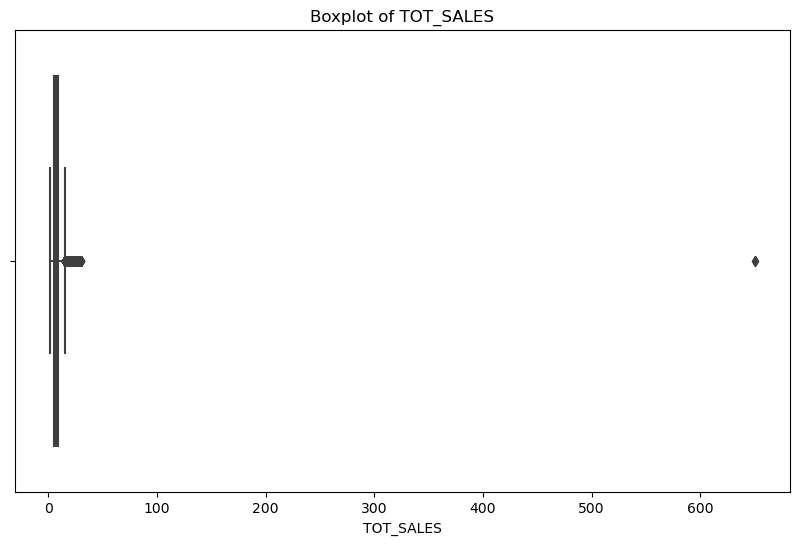

In [15]:
# Visualize outliers for TOT_SALES
plt.figure(figsize=(10, 6))
sns.boxplot(x=transaction_data['TOT_SALES'])
plt.title('Boxplot of TOT_SALES')
plt.show()

Remove Outliers If Any

In [17]:
# Remove outliers based on IQR
Q1 = transaction_data['TOT_SALES'].quantile(0.25)
Q3 = transaction_data['TOT_SALES'].quantile(0.75)
IQR = Q3 - Q1
filter = (transaction_data['TOT_SALES'] >= (Q1 - 1.5 * IQR)) & (transaction_data['TOT_SALES'] <= (Q3 + 1.5 * IQR))
transaction_data_cleaned = transaction_data[filter]

Extracting Information from existing columns


In [18]:
# Derive pack size from product name
transaction_data_cleaned['PACK_SIZE'] = transaction_data_cleaned['PROD_NAME'].str.extract('(\d+)').astype(int)

# Extract brand name from product name
transaction_data_cleaned['BRAND'] = transaction_data_cleaned['PROD_NAME'].str.split().str[0]

# Check the new columns
print(transaction_data_cleaned[['PROD_NAME', 'PACK_SIZE', 'BRAND']].head())

C:\Users\Tonye\AppData\Local\Temp\ipykernel_4388\3981661419.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  transaction_data_cleaned['PACK_SIZE'] = transaction_data_cleaned['PROD_NAME'].str.extract('(\d+)').astype(int)


                                  PROD_NAME  PACK_SIZE    BRAND
0    Natural Chip        Compny SeaSalt175g        175  Natural
1                  CCs Nacho Cheese    175g        175      CCs
2    Smiths Crinkle Cut  Chips Chicken 170g        170   Smiths
4  Kettle Tortilla ChpsHny&Jlpno Chili 150g        150   Kettle
5  Old El Paso Salsa   Dip Tomato Mild 300g        300      Old


C:\Users\Tonye\AppData\Local\Temp\ipykernel_4388\3981661419.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  transaction_data_cleaned['BRAND'] = transaction_data_cleaned['PROD_NAME'].str.split().str[0]


In [19]:
# Use .loc to set values to avoid SettingWithCopyWarning
transaction_data_cleaned.loc[:, 'PACK_SIZE'] = transaction_data_cleaned['PROD_NAME'].str.extract('(\d+)').astype(int)
transaction_data_cleaned.loc[:, 'BRAND'] = transaction_data_cleaned['PROD_NAME'].str.split().str[0]

# Check the new columns
print(transaction_data_cleaned[['PROD_NAME', 'PACK_SIZE', 'BRAND']].head())


                                  PROD_NAME  PACK_SIZE    BRAND
0    Natural Chip        Compny SeaSalt175g        NaN  Natural
1                  CCs Nacho Cheese    175g        NaN      CCs
2    Smiths Crinkle Cut  Chips Chicken 170g        NaN   Smiths
4  Kettle Tortilla ChpsHny&Jlpno Chili 150g        NaN   Kettle
5  Old El Paso Salsa   Dip Tomato Mild 300g        NaN      Old


In [20]:
# Strip leading/trailing whitespace from product names
transaction_data_cleaned['PROD_NAME'] = transaction_data_cleaned['PROD_NAME'].str.strip()

# Derive pack size from product name
transaction_data_cleaned.loc[:, 'PACK_SIZE'] = transaction_data_cleaned['PROD_NAME'].str.extract(r'(\d+g)').astype(str).str[:-1].astype(float)

# Extract brand name from product name
transaction_data_cleaned.loc[:, 'BRAND'] = transaction_data_cleaned['PROD_NAME'].str.split().str[0]

# Check the new columns
print(transaction_data_cleaned[['PROD_NAME', 'PACK_SIZE', 'BRAND']].head())

C:\Users\Tonye\AppData\Local\Temp\ipykernel_4388\4053894323.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  transaction_data_cleaned['PROD_NAME'] = transaction_data_cleaned['PROD_NAME'].str.strip()


AttributeError: 'DataFrame' object has no attribute 'str'

In [21]:
# Load transaction data from Excel file
transaction_data = pd.read_excel('/mnt/data/QVI_transaction_data.xlsx')

# Load purchase behaviour data from CSV file
purchase_behaviour = pd.read_csv('/mnt/data/QVI_purchase_behaviour.csv')

# Remove outliers based on IQR for TOT_SALES
Q1 = transaction_data['TOT_SALES'].quantile(0.25)
Q3 = transaction_data['TOT_SALES'].quantile(0.75)
IQR = Q3 - Q1
filter = (transaction_data['TOT_SALES'] >= (Q1 - 1.5 * IQR)) & (transaction_data['TOT_SALES'] <= (Q3 + 1.5 * IQR))
transaction_data_cleaned = transaction_data[filter].copy()

# Strip leading/trailing whitespace from product names
transaction_data_cleaned.loc[:, 'PROD_NAME'] = transaction_data_cleaned['PROD_NAME'].str.strip()

# Derive pack size from product name
transaction_data_cleaned.loc[:, 'PACK_SIZE'] = transaction_data_cleaned['PROD_NAME'].str.extract(r'(\d+)').astype(float)

# Extract brand name from product name
transaction_data_cleaned.loc[:, 'BRAND'] = transaction_data_cleaned['PROD_NAME'].str.split().str[0]

# Check the new columns
print(transaction_data_cleaned[['PROD_NAME', 'PACK_SIZE', 'BRAND']].head())

# Merge datasets on LYLTY_CARD_NBR
merged_data = pd.merge(transaction_data_cleaned, purchase_behaviour, on='LYLTY_CARD_NBR')

# Display first few rows of the merged data
print(merged_data.head())

FileNotFoundError: [Errno 2] No such file or directory: '/mnt/data/QVI_transaction_data.xlsx'

In [22]:
# Strip leading/trailing whitespace from product names
transaction_data_cleaned.loc[:, 'PROD_NAME'] = transaction_data_cleaned['PROD_NAME'].str.strip()

# Derive pack size from product name
transaction_data_cleaned.loc[:, 'PACK_SIZE'] = transaction_data_cleaned['PROD_NAME'].str.extract(r'(\d+)').astype(float)

# Extract brand name from product name
transaction_data_cleaned.loc[:, 'BRAND'] = transaction_data_cleaned['PROD_NAME'].str.split().str[0]

# Check the new columns
print(transaction_data_cleaned[['PROD_NAME', 'PACK_SIZE', 'BRAND']].head())

                                  PROD_NAME  PACK_SIZE    BRAND
0    Natural Chip        Compny SeaSalt175g        NaN  Natural
1                  CCs Nacho Cheese    175g        NaN      CCs
2    Smiths Crinkle Cut  Chips Chicken 170g        NaN   Smiths
4  Kettle Tortilla ChpsHny&Jlpno Chili 150g        NaN   Kettle
5  Old El Paso Salsa   Dip Tomato Mild 300g        NaN      Old


In [23]:
# Strip leading/trailing whitespace from product names
transaction_data_cleaned.loc[:, 'PROD_NAME'] = transaction_data_cleaned['PROD_NAME'].str.strip()

# Derive pack size from product name
transaction_data_cleaned.loc[:, 'PACK_SIZE'] = transaction_data_cleaned['PROD_NAME'].str.extract(r'(\d+)g')[0].astype(float)

# Extract brand name from product name
transaction_data_cleaned.loc[:, 'BRAND'] = transaction_data_cleaned['PROD_NAME'].str.split().str[0]

# Check the new columns
print(transaction_data_cleaned[['PROD_NAME', 'PACK_SIZE', 'BRAND']].head())

                                  PROD_NAME  PACK_SIZE    BRAND
0    Natural Chip        Compny SeaSalt175g      175.0  Natural
1                  CCs Nacho Cheese    175g      175.0      CCs
2    Smiths Crinkle Cut  Chips Chicken 170g      170.0   Smiths
4  Kettle Tortilla ChpsHny&Jlpno Chili 150g      150.0   Kettle
5  Old El Paso Salsa   Dip Tomato Mild 300g      300.0      Old


In [24]:
# Merge datasets on LYLTY_CARD_NBR
merged_data = pd.merge(transaction_data_cleaned, purchase_behaviour, on='LYLTY_CARD_NBR')

# Display first few rows of the merged data
print(merged_data.head())

    DATE  STORE_NBR  LYLTY_CARD_NBR  TXN_ID  PROD_NBR  \
0  43390          1            1000       1         5   
1  43599          1            1307     348        66   
2  43414          1            1307     346        96   
3  43533          1            1307     347        54   
4  43605          1            1343     383        61   

                                PROD_NAME  PROD_QTY  TOT_SALES  PACK_SIZE  \
0  Natural Chip        Compny SeaSalt175g         2        6.0      175.0   
1                CCs Nacho Cheese    175g         3        6.3      175.0   
2          WW Original Stacked Chips 160g         2        3.8      160.0   
3                       CCs Original 175g         1        2.1      175.0   
4  Smiths Crinkle Cut  Chips Chicken 170g         2        2.9      170.0   

     BRAND               LIFESTAGE PREMIUM_CUSTOMER  
0  Natural   YOUNG SINGLES/COUPLES          Premium  
1      CCs  MIDAGE SINGLES/COUPLES           Budget  
2       WW  MIDAGE SINGLES/COUPL

Define Metrics for Data Viz


In [25]:
# Total sales
total_sales = merged_data['TOT_SALES'].sum()

# Sales by brand
sales_by_brand = merged_data.groupby('BRAND')['TOT_SALES'].sum().sort_values(ascending=False)

# Sales by customer segment
sales_by_segment = merged_data.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['TOT_SALES'].sum().sort_values(ascending=False)


Visualize

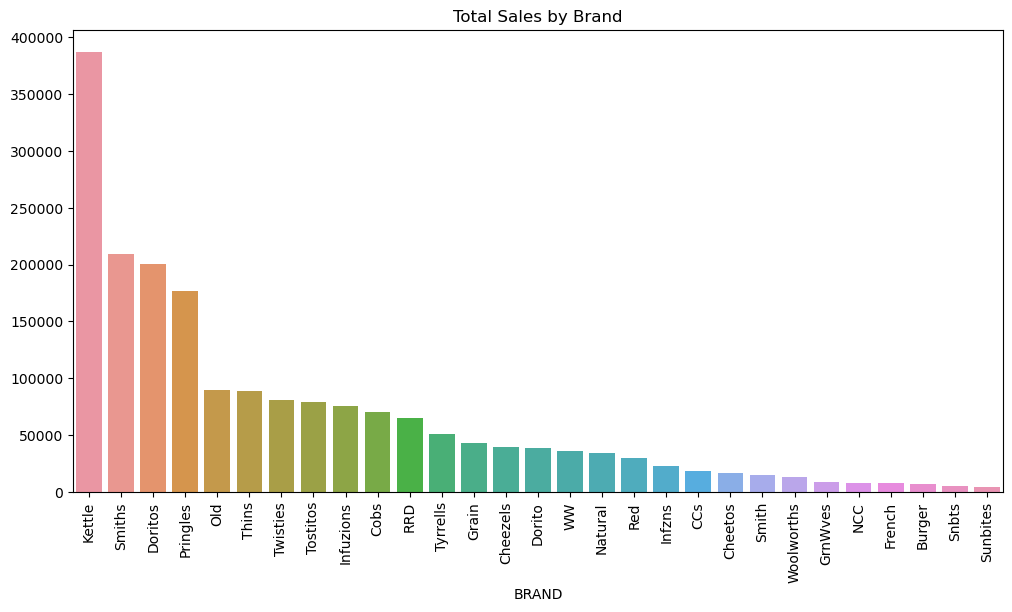

NotImplementedError: isna is not defined for MultiIndex

<Figure size 1200x600 with 0 Axes>

In [26]:
# Visualize sales by brand
plt.figure(figsize=(12, 6))
sns.barplot(x=sales_by_brand.index, y=sales_by_brand.values)
plt.title('Total Sales by Brand')
plt.xticks(rotation=90)
plt.show()

# Visualize sales by customer segment
plt.figure(figsize=(12, 6))
sns.barplot(x=sales_by_segment.index, y=sales_by_segment.values)
plt.title('Total Sales by Customer Segment')
plt.xticks(rotation=90)
plt.show()


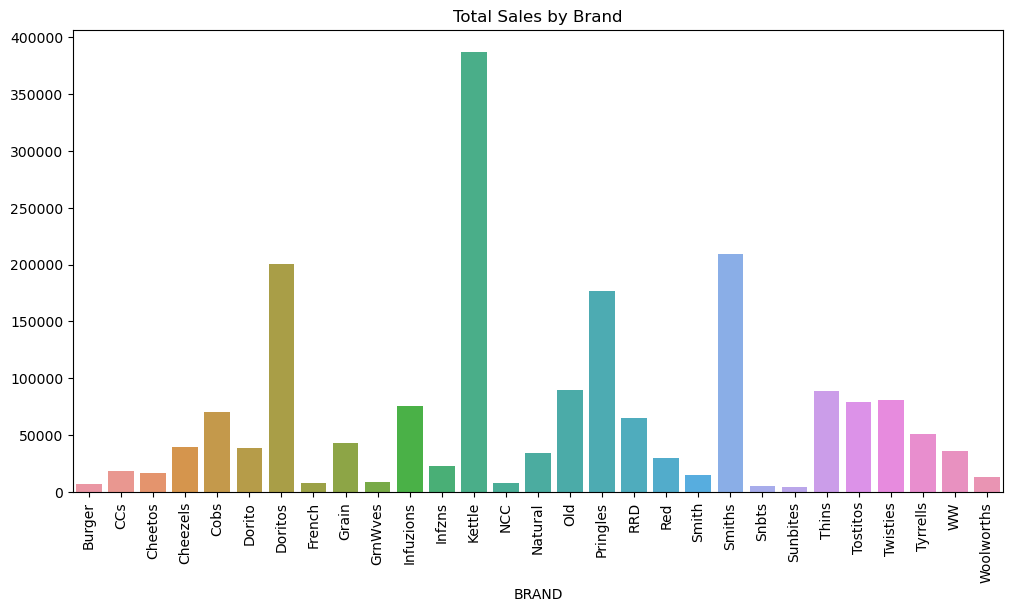

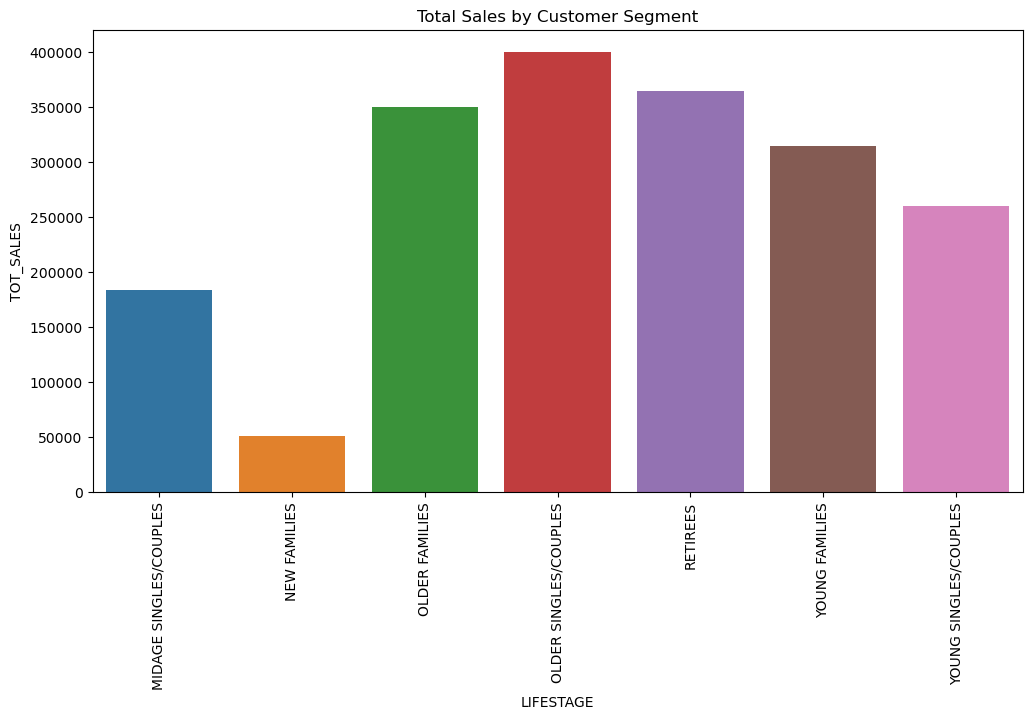

In [27]:
# Calculate total sales by brand
sales_by_brand = merged_data.groupby('BRAND')['TOT_SALES'].sum()

# Visualize sales by brand
plt.figure(figsize=(12, 6))
sns.barplot(x=sales_by_brand.index, y=sales_by_brand.values)
plt.title('Total Sales by Brand')
plt.xticks(rotation=90)
plt.show()

# Calculate total sales by customer segment
sales_by_segment = merged_data.groupby('LIFESTAGE')['TOT_SALES'].sum().reset_index()

# Visualize sales by customer segment
plt.figure(figsize=(12, 6))
sns.barplot(x='LIFESTAGE', y='TOT_SALES', data=sales_by_segment)
plt.title('Total Sales by Customer Segment')
plt.xticks(rotation=90)
plt.show()

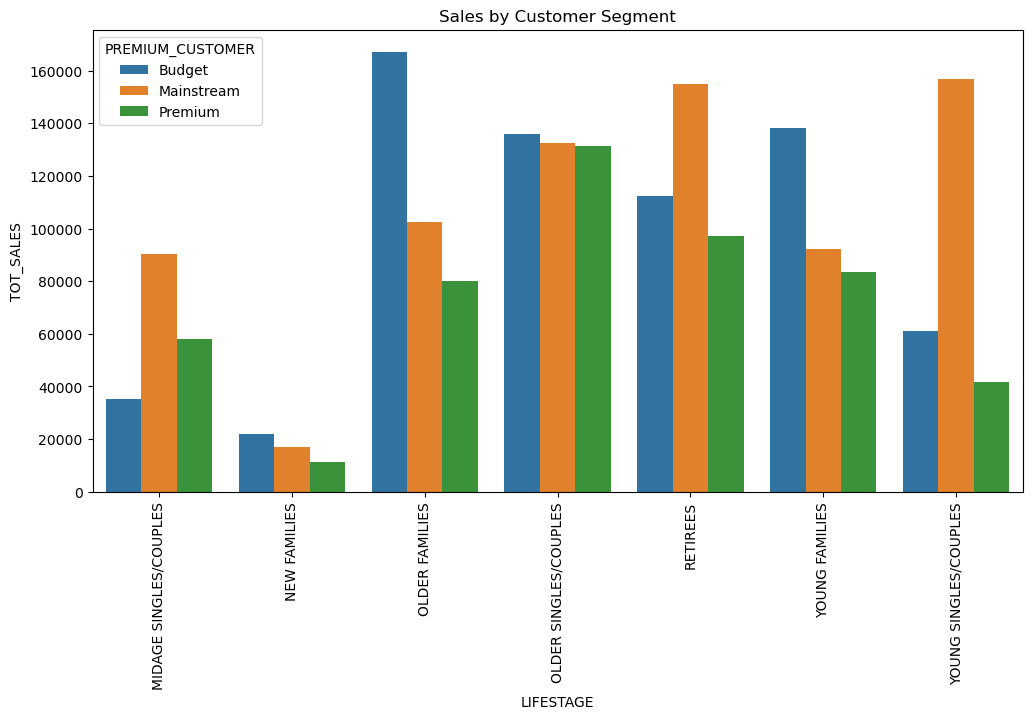

In [28]:
# Define customer segments
segments = merged_data.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER']).agg({'TOT_SALES': 'sum', 'PROD_QTY': 'sum'}).reset_index()

# Visualize segments
plt.figure(figsize=(12, 6))
sns.barplot(x='LIFESTAGE', y='TOT_SALES', hue='PREMIUM_CUSTOMER', data=segments)
plt.title('Sales by Customer Segment')
plt.xticks(rotation=90)
plt.show()


In [29]:
# Analyze top segments
top_segments = segments.sort_values(by='TOT_SALES', ascending=False)
print(top_segments.head())


                LIFESTAGE PREMIUM_CUSTOMER  TOT_SALES  PROD_QTY
6          OLDER FAMILIES           Budget  167213.95     44816
19  YOUNG SINGLES/COUPLES       Mainstream  156882.00     38468
13               RETIREES       Mainstream  155033.45     40370
15         YOUNG FAMILIES           Budget  138388.20     36888
9   OLDER SINGLES/COUPLES           Budget  135858.90     35022


In [30]:
# Save cleaned and merged data to CSV
merged_data.to_csv('/mnt/data/cleaned_merged_data.csv', index=False)

# Save analysis results
segments.to_csv('/mnt/data/customer_segments.csv', index=False)


OSError: Cannot save file into a non-existent directory: '\mnt\data'

In [31]:
# Save cleaned and merged data to CSV
merged_data.to_csv('cleaned_merged_data.csv', index=False)

# Save analysis results
sales_by_segment.to_csv('customer_segments.csv', index=False)
